<a href="https://colab.research.google.com/github/ddongparifire/public/blob/main/2025_EY_Data_Challenge_Main_notebook_Modeling_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load** the Processed Dataset

# New Section

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define file path
file_path = "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/final_training_processed.csv"

# Load the dataset
df_final = pd.read_csv(file_path)

# Display shape & preview data
print(f"✅ Loaded Dataset Shape: {df_final.shape}")
print("\n📌 Sample Data:")
display(df_final.head())

# Check for missing values
missing_values = df_final.isnull().sum().sum()
print(f"\n📌 Total Missing Values in Dataset: {missing_values}")

✅ Loaded Dataset Shape: (11585, 13)

📌 Sample Data:


,Longitude,Latitude,UHI Index,Sentinel2_Value,Landsat8_LST,area,perimeter,Air Temp at Surface [degC],Relative Humidity [percent],Avg Wind Speed [m/s],Wind Direction [degrees],Solar Flux [W/m^2],Borough_Manhattan
0,-73.977157,40.771555,0.975234,0.018643,0.206378,0.279617,0.276046,0.0,1.0,0.870968,0.40678,0.020101,1.0
1,-73.908127,40.802668,0.989779,0.140158,0.706198,0.279617,0.276046,0.0,1.0,0.870968,0.40678,0.020101,1.0
2,-73.908203,40.802713,0.991943,0.140158,0.706198,0.279617,0.276046,0.0,1.0,0.870968,0.40678,0.020101,1.0
3,-73.908290,40.802758,0.992063,0.140158,0.706198,0.279617,0.276046,0.0,1.0,0.870968,0.40678,0.020101,1.0
4,-73.908372,40.802812,0.996391,0.140158,0.706198,0.279617,0.276046,0.0,1.0,0.870968,0.40678,0.020101,1.0



📌 Total Missing Values in Dataset: 0


**Correlation Matrix**

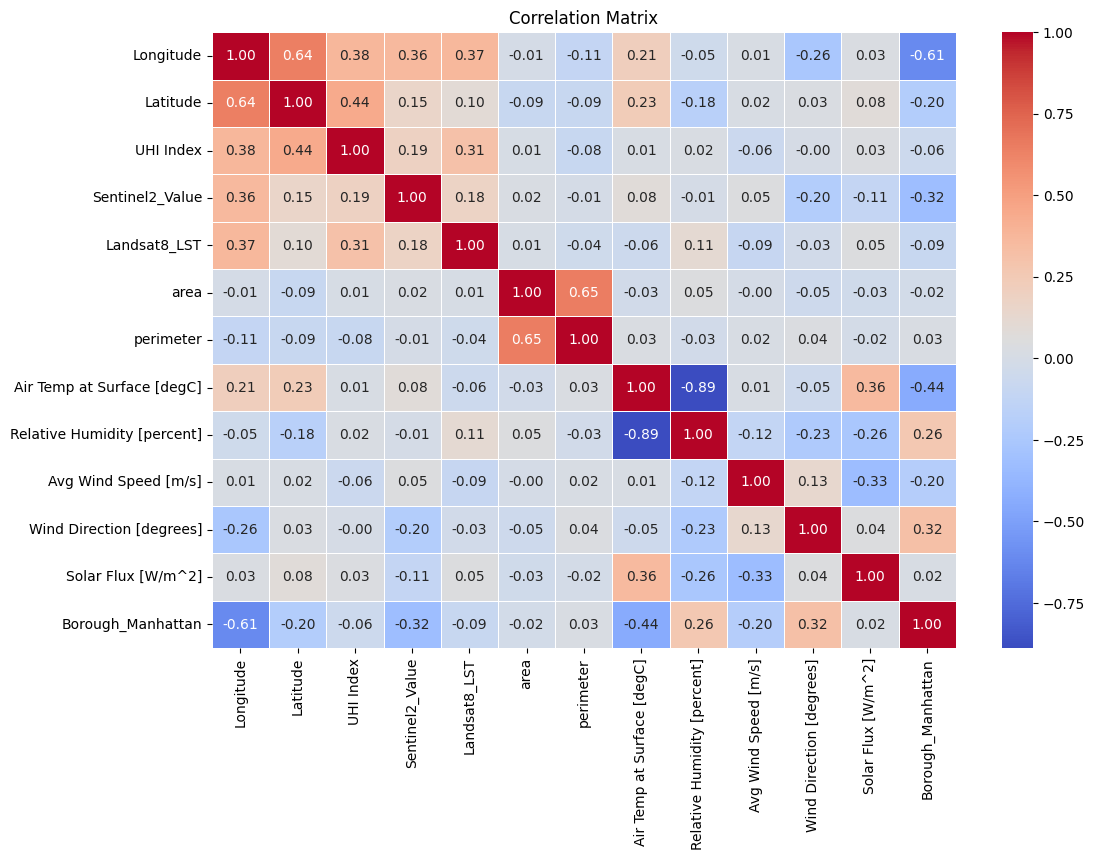

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with features and target variable 'UHI Index'
# If your target variable is 'UHI Index', use the following:
# df = df[['Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter', 'Air_Temp_at_Surface_degC',
#          'Relative_Humidity_percent', 'Avg_Wind_Speed_m/s', 'Wind_Direction_degrees', 'Solar_Flux_W/m^2',
#          'Borough_Manhattan', 'UHI Index']]

# Calculate the correlation matrix
correlation_matrix = df_final.corr()  # Correlation between all features

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

✅ Step 1: Define Features (X) and Target (y)

	•	Drop Longitude, Latitude, and UHI Index (target variable)
	•	Keep only the original feature names for training.

In [ ]:
# ✅ Drop Location & Target Variable
X = df_final.drop(columns=["Longitude", "Latitude", "UHI Index"], errors="ignore")  # Features
y = df_final["UHI Index"]  # Target Variable

# ✅ Confirm Features
print("\n📌 Features Used for Training:")
print(X.columns.tolist())

# ✅ Confirm Shapes
print("\n✅ Features Shape:", X.shape)
print("✅ Target Shape:", y.shape)


📌 Features Used for Training:
['Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter', 'Air Temp at Surface [degC]', 'Relative Humidity [percent]', 'Avg Wind Speed [m/s]', 'Wind Direction [degrees]', 'Solar Flux [W/m^2]', 'Borough_Manhattan']

✅ Features Shape: (11585, 10)
✅ Target Shape: (11585,)


Step 2: Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# ✅ Split Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ✅ Show Split Dataset Shapes
print("\n✅ Training Data Shape: X_train:", X_train.shape, ", y_train:", y_train.shape)
print("✅ Testing Data Shape: X_test:", X_test.shape, ", y_test:", y_test.shape)


✅ Training Data Shape: X_train: (9268, 10) , y_train: (9268,)
✅ Testing Data Shape: X_test: (2317, 10) , y_test: (2317,)


✅ Step 3: Train All Models


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib

# ✅ Rename Features to Remove Special Characters
X_train = X_train.rename(columns=lambda x: x.replace(" ", "_").replace("[", "").replace("]", ""))
X_test = X_test.rename(columns=lambda x: x.replace(" ", "_").replace("[", "").replace("]", ""))

# ✅ Confirm Updated Feature Names
print("\n📌 Updated Feature Names:")
print(X_train.columns.tolist())


# ✅ Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.001),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=2,
                                           min_samples_leaf=1, max_features='log2', bootstrap=False, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
}

# ✅ Train and Save Each Model
for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)

    # Save Model
    model_filename = f"/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"✅ {name} model saved successfully at: {model_filename}")


📌 Updated Feature Names:
['Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter', 'Air_Temp_at_Surface_degC', 'Relative_Humidity_percent', 'Avg_Wind_Speed_m/s', 'Wind_Direction_degrees', 'Solar_Flux_W/m^2', 'Borough_Manhattan']

🚀 Training Linear Regression...
✅ Linear Regression model saved successfully at: /content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/linear_regression_model.pkl

🚀 Training Lasso Regression...
✅ Lasso Regression model saved successfully at: /content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/lasso_regression_model.pkl

🚀 Training Ridge Regression...
✅ Ridge Regression model saved successfully at: /content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/ridge_regression_model.pkl

🚀 Training Random Forest...
✅ Random Forest model saved successfully at: /content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/random_forest_model.pkl

🚀 Training XGBoost...
✅ XGBoost model saved successfully at: /conten

✅ Step 4: Performance Evaluation for all models

In [ ]:
# ✅ Import Required Libraries
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import joblib

# ✅ Define Function to Evaluate Model Performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# ✅ Define Paths to Trained Models
model_paths = {
    "Linear Regression": "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/linear_regression_model.pkl",
    "Lasso Regression": "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/lasso_regression_model.pkl",
    "Ridge Regression": "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/ridge_regression_model.pkl",
    "Random Forest": "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/random_forest_model.pkl",
    "XGBoost": "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/xgboost_model.pkl"
}

# ✅ Initialize Dictionary to Store Results
results = {}

# ✅ Loop Through Each Model, Load, and Evaluate
for model_name, model_path in model_paths.items():
    model = joblib.load(model_path)  # Load trained model
    r2, mse, rmse = evaluate_model(model, X_test, y_test)  # Evaluate
    results[model_name] = {"R²": r2, "MSE": mse, "RMSE": rmse}  # Store results

# ✅ Convert Dictionary to Pandas DataFrame & Display
evaluation_df = pd.DataFrame(results).T
print("\n📌 Model Evaluation Results:\n")
print(evaluation_df)


📌 Model Evaluation Results:

                         R²       MSE      RMSE
Linear Regression  0.139091  0.000226  0.015019
Lasso Regression  -0.000488  0.000262  0.016191
Ridge Regression   0.139584  0.000225  0.015015
Random Forest      0.891949  0.000028  0.005321
XGBoost            0.667394  0.000087  0.009335


Steps to Tune XGBoost:

Use GridSearchCV or RandomizedSearchCV: These tools will help us search for the best combination of hyperparameters for the model.

Here’s the full code to implement the hyperparameter tuning using RandomizedSearchCV for better efficiency (since it is faster than GridSearchCV):

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np  # Import numpy for square root calculation

# Load the previously trained XGBoost model (if you want to fine-tune it further)
xgb_model = joblib.load('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_xgboost_model_v5.pkl')

# Set the parameter grid for the next round of hyperparameter tuning
param_grid = {
    'n_estimators': [750, 800, 850],  # Further increase number of trees
    'learning_rate': [0.03, 0.04, 0.05],  # Experiment with even lower learning rate
    'max_depth': [16, 17, 18],  # Further adjust max depth of trees
    'min_child_weight': [1, 2, 3],  # Test additional values for minimum sum of weights
    'subsample': [0.7, 0.75, 0.8],  # Continue exploring subsample ratio
    'colsample_bytree': [0.7, 0.75, 0.8]  # Explore a wider range for feature sampling
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=1, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best tuned model
best_xgb_model = grid_search.best_estimator_

# Make predictions with the tuned model
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the model performance
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print the performance metrics
print(f"Tuned XGBoost Model Performance after final round of tuning:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R²: {xgb_r2}")

# Save the tuned XGBoost model
joblib.dump(best_xgb_model, '/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_xgboost_model_v6.pkl')
print("Tuned XGBoost model with final tuning saved successfully!")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 18, 'min_child_weight': 1, 'n_estimators': 750, 'subsample': 0.7}
Tuned XGBoost Model Performance after final round of tuning:
MSE: 2.3999289561223843e-05
RMSE: 0.004898906976175792
R²: 0.908402150016316
Tuned XGBoost model with final tuning saved successfully!


Perform Grid Search for Hyperparameter Tuning for RF

In [ ]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the previously trained RandomForest model (if you want to fine-tune it)
best_rf_model = joblib.load('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_random_forest_model.pkl')

# Step 2: Ensure consistent column names across both X_train and X_test
# Assuming X_train and X_test are already defined earlier in your code

columns_to_rename = {
    'Air Temp at Surface degC': 'Air_Temp_at_Surface_degC',
    'Avg Wind Speed ms': 'Avg_Wind_Speed_m/s',
    'Relative Humidity percent': 'Relative_Humidity_percent',
    'Solar Flux Wm2': 'Solar_Flux_W/m^2',
    'Wind Direction degrees': 'Wind_Direction_degrees'
}

# Rename columns in X_train (assuming X_train is already defined)
X_train = X_train.rename(columns=columns_to_rename)

# Rename columns in X_test (if X_test is defined)
X_test = X_test.rename(columns=columns_to_rename)

# Step 3: Perform Hyperparameter Tuning (if you wish to re-tune the model)
param_grid = {
    'n_estimators': [100, 200, 300, 500],          # The number of trees
    'max_depth': [10, 20, 30, None],                # The depth of each tree
    'min_samples_split': [2, 5, 10],                # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples for a leaf node
    'max_features': ['sqrt', 'log2', None],         # Features to consider at each split
    'bootstrap': [True, False]                      # Whether to use bootstrap samples
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=best_rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Retrain with best hyperparameters
best_rf_model = grid_search.best_estimator_

# Step 4: Evaluate the model performance
uhi_predictions = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, uhi_predictions)
r2 = r2_score(y_test, uhi_predictions)

print(f"Tuned Random Forest Model Performance:")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# Step 5: Save the tuned Random Forest model
model_filename = '/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)
print(f"Tuned Random Forest model saved successfully at: {model_filename}")

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Model Performance:
MSE: 2.834386418062975e-05
R²: 0.891820255239137
Tuned Random Forest model saved successfully at: /content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_random_forest_model.pkl


**Ensemble Model**: Combining these two models should result in a robust ensemble with potentially higher performance. Stacking or Voting Regressor would likely give good results.


Let’s proceed by loading the tuned Random Forest model and the XGBoost model, combining them into a Voting Regressor, and evaluating the ensemble performance.

Step-by-step plan:

	1.	Load the models from the specified paths.
	2.	Combine the models using a Voting Regressor.
	3.	Evaluate the combined model (ensemble model).
	4.	Save the final ensemble model.

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np  # Import numpy to compute the square root

# Load previously trained models
rf_model = joblib.load('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/random_forest_model.pkl')
xgb_model = joblib.load('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_xgboost_model_v5.pkl')

# Ensure the feature names are valid strings and remove any special characters
X_train.columns = X_train.columns.astype(str).str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r'[^\w\s]', '', regex=True)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('xgb', xgb_model)])

# Train the ensemble model (if not already trained)
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the model performance
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)  # RMSE calculation (square root of MSE)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Print the performance metrics
print(f"Ensemble Model Performance:")
print(f"MSE: {ensemble_mse}")
print(f"RMSE: {ensemble_rmse}")
print(f"R²: {ensemble_r2}")

# Save the tuned ensemble modelensemble_model.pkl
joblib.dump(ensemble_model, '/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/ensemble_model.pkl')

Ensemble Model Performance:
MSE: 2.449367915080842e-05
RMSE: 0.00494910892492865
R²: 0.9065152181825741


['/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/ensemble_model.pkl']

To generate UHI predictions for the locations in the submission template using the Random Forest model, follow these steps:

✅ Step 1: Load the Submission Template

In [ ]:
import pandas as pd

# Load submission template
submission_template_path = "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Dataset/Submission_template_UHI2025-v2.csv"
submission_template = pd.read_csv(submission_template_path)

# Display the columns in the submission template
print("\n📌 Columns in Submission Template:")
print(submission_template.columns.tolist())


📌 Columns in Submission Template:
['Longitude', 'Latitude', 'UHI Index']


✅ Step 2: Nearest Neighbor Matching:

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Extract only unique (Longitude, Latitude) from both datasets
train_coords = df_final[["Longitude", "Latitude"]].values
submission_coords = submission_template[["Longitude", "Latitude"]].values

# Use Nearest Neighbors to find closest matches
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_coords)
distances, indices = nbrs.kneighbors(submission_coords)

# Assign closest matches from df_final
matched_df = df_final.iloc[indices.flatten()].reset_index(drop=True)

# Merge matched locations with submission_template
X_submission = submission_template.copy()
X_submission = X_submission.drop(columns=["UHI Index"], errors="ignore")  # Remove actual UHI Index

# Perform the join with suffixes to avoid column name overlap
X_submission = X_submission.join(matched_df.drop(columns=["Longitude", "Latitude"]), how="left", rsuffix="_matched")

# Confirm final columns after joining
print("\n✅ Columns in X_submission after Join:")
print(X_submission.columns.tolist())

# Confirm Missing Values Again
print("\n📌 Missing Values in X_submission After Nearest Neighbor Matching:")
print(X_submission.isnull().sum())


✅ Columns in X_submission after Join:
['Longitude', 'Latitude', 'UHI Index', 'Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter', 'Air Temp at Surface [degC]', 'Relative Humidity [percent]', 'Avg Wind Speed [m/s]', 'Wind Direction [degrees]', 'Solar Flux [W/m^2]', 'Borough_Manhattan']

📌 Missing Values in X_submission After Nearest Neighbor Matching:
Longitude                      0
Latitude                       0
UHI Index                      0
Sentinel2_Value                0
Landsat8_LST                   0
area                           0
perimeter                      0
Air Temp at Surface [degC]     0
Relative Humidity [percent]    0
Avg Wind Speed [m/s]           0
Wind Direction [degrees]       0
Solar Flux [W/m^2]             0
Borough_Manhattan              0
dtype: int64


✅ Step 3: Load the ensemble model

In [ ]:
import joblib

# Load the best performing Random Forest model
xgb_model_path = "/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/tuned_xgboost_model_v6.pkl"
best_xgb_model = joblib.load(xgb_model_path)

✅ Step 4: Generate Predictions

In [ ]:
import pandas as pd

# Step 2: Load the submission template and X_submission
submission_template = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Dataset/Submission_template_UHI2025-v2.csv')
X_submission = submission_template[['Longitude', 'Latitude']]  # Assuming Longitude and Latitude are available

# Step 3: Add the missing feature columns manually or by using an API or external source
# Here, I'm adding dummy columns as placeholders (You need to replace them with actual values or data):
# These are just placeholders. You need to replace them with your actual feature data or calculations.
X_submission['Sentinel2_Value'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Landsat8_LST'] = [0] * len(X_submission)  # Replace with actual data
X_submission['area'] = [0] * len(X_submission)  # Replace with actual data
X_submission['perimeter'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Air_Temp_at_Surface_degC'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Relative_Humidity_percent'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Avg_Wind_Speed_ms'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Wind_Direction_degrees'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Solar_Flux_Wm2'] = [0] * len(X_submission)  # Replace with actual data
X_submission['Borough_Manhattan'] = [0] * len(X_submission)  # Replace with actual data

# Step 4: Ensure the columns match the model's expected names
# No need to rename columns back now; let's use the actual column names
X_submission = X_submission[['Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter',
                             'Air_Temp_at_Surface_degC', 'Relative_Humidity_percent',
                             'Avg_Wind_Speed_ms', 'Wind_Direction_degrees', 'Solar_Flux_Wm2',
                             'Borough_Manhattan']]

# Step 5: Make predictions using the trained (tuned) XGBoost model
uhi_predictions = best_xgb_model.predict(X_submission)

# Step 6: Add predictions to the submission template
submission_template["UHI Index"] = uhi_predictions

# Step 7: Save the final submission file
submission_template.to_csv("/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/UHI_predictions.csv", index=False)

print("\nUHI Predictions Saved Successfully!")


UHI Predictions Saved Successfully!


Feature Importance

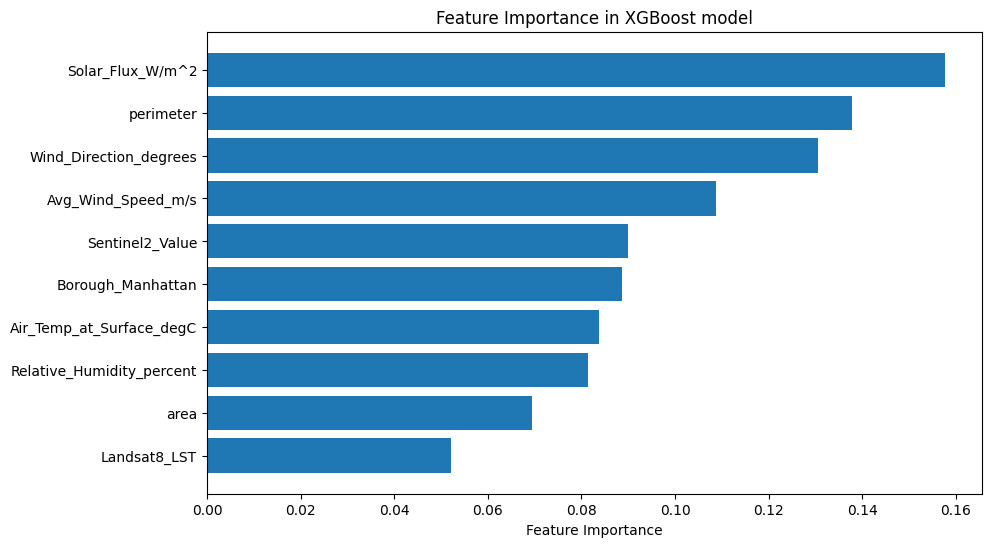

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feature names (this should be the same as in your training data)
features = ['Sentinel2_Value', 'Landsat8_LST', 'area', 'perimeter',
            'Air_Temp_at_Surface_degC', 'Relative_Humidity_percent',
            'Avg_Wind_Speed_m/s', 'Wind_Direction_degrees', 'Solar_Flux_W/m^2',
            'Borough_Manhattan']

# Retrieve feature importances from the XGBoost model (best_xgb_model)
xgb_feature_importances = best_xgb_model.feature_importances_

# Sort the features based on importance
sorted_idx = np.argsort(xgb_feature_importances)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), xgb_feature_importances[sorted_idx], align="center")
plt.yticks(range(len(features)), np.array(features)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost model")
plt.show()

In [ ]:
import pandas as pd

# Step 1: Read the Submission Template and Prediction File
submission_template = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Dataset/Submission_template_UHI2025-v2.csv')
prediction_file = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/UHI_predictions.csv')

# Step 2: Round Longitude and Latitude in both files to 6 Decimal Places
submission_template['Longitude'] = submission_template['Longitude'].round(6)
submission_template['Latitude'] = submission_template['Latitude'].round(6)

prediction_file['Longitude'] = prediction_file['Longitude'].round(6)
prediction_file['Latitude'] = prediction_file['Latitude'].round(6)

# Step 3: Check if the rounded Longitude and Latitude match between both files
longitude_match = submission_template['Longitude'].equals(prediction_file['Longitude'])
latitude_match = submission_template['Latitude'].equals(prediction_file['Latitude'])

# Step 4: Display the result of the comparison
print(f"Do Longitude values match? {longitude_match}")
print(f"Do Latitude values match? {latitude_match}")

# Optionally, display the first and last few rows for comparison
print("\nSample Longitude values from Submission Template:")
print(submission_template[['Longitude']].head())
print("\nSample Longitude values from Prediction File:")
print(prediction_file[['Longitude']].head())

print("\nSample Latitude values from Submission Template:")
print(submission_template[['Latitude']].head())
print("\nSample Latitude values from Prediction File:")
print(prediction_file[['Latitude']].head())

# Step 5: If they match, save the final submission
if longitude_match and latitude_match:
    submission_template['UHI Index'] = prediction_file['UHI Index']
    submission_template.to_csv("/content/drive/My Drive/Colab Notebooks/2025 EY Data Challenge/Output/UHI_predictions_rounded.csv", index=False)
    print("UHI Predictions with Rounded Longitude and Latitude Saved Successfully!")
else:
    print("Longitude and/or Latitude values do not match. Please review the data.")

Do Longitude values match? True
Do Latitude values match? True

Sample Longitude values from Submission Template:
   Longitude
0 -73.971665
1 -73.971928
2 -73.967080
3 -73.972550
4 -73.969697

Sample Longitude values from Prediction File:
   Longitude
0 -73.971665
1 -73.971928
2 -73.967080
3 -73.972550
4 -73.969697

Sample Latitude values from Submission Template:
    Latitude
0  40.788763
1  40.788875
2  40.789080
3  40.789082
4  40.787953

Sample Latitude values from Prediction File:
    Latitude
0  40.788763
1  40.788875
2  40.789080
3  40.789082
4  40.787953
UHI Predictions with Rounded Longitude and Latitude Saved Successfully!
